<a href="https://colab.research.google.com/github/allielabrecque4-debug/MLE-Final-Project/blob/main/Wind_Turbine_Dataset_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Project: Wind Turbine Energy Prediction <br> Allie Labrecque <br> 662017931

In [1]:
# load Wind Turbine Scada dataset from kaggle
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/WindProps.csv'
df = pd.read_csv(csv_path)

# Separate features (wind speed, wind direction, theoretical power) from target (active power)
X = df[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y = df['LV ActivePower (kW)']
timestamps = df['Date/Time']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test, timestamps_train, timestamps_test = train_test_split(
    X, y, timestamps, test_size=0.3, random_state=42)


Mounted at /content/drive


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 168414.26024115196
R-squared (R2): 0.9021376706300738


In [ ]:
# Combine features and target for descriptive statistics
df_combined = pd.concat([X, y], axis=1)

# Generate descriptive statistics
descriptive_stats = df_combined.describe()

# Display the table
display(descriptive_stats)

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),LV ActivePower (kW)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,7.557952,1492.175463,123.687559,1307.684332
std,4.227166,1368.018238,93.443736,1312.459242
min,0.000000,0.000000,0.000000,-2.471405
25%,4.201395,161.328167,49.315437,50.677890
50%,7.104594,1063.776283,73.712978,825.838074
75%,10.300020,2964.972462,201.696720,2482.507568
max,25.206011,3600.000000,359.997589,3618.732910


from matplotlib import pyplot as plt
descriptive_stats['Wind Speed (m/s)'].plot(kind='hist', bins=20, title='Wind Speed (m/s)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
descriptive_stats['Theoretical_Power_Curve (KWh)'].plot(kind='hist', bins=20, title='Theoretical_Power_Curve (KWh)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
descriptive_stats['Wind Direction (°)'].plot(kind='hist', bins=20, title='Wind Direction (°)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
descriptive_stats['LV ActivePower (kW)'].plot(kind='hist', bins=20, title='LV ActivePower (kW)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
descriptive_stats.plot(kind='scatter', x='Wind Speed (m/s)', y='Theoretical_Power_Curve (KWh)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
descriptive_stats.plot(kind='scatter', x='Theoretical_Power_Curve (KWh)', y='Wind Direction (°)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
descriptive_stats.plot(kind='scatter', x='Wind Direction (°)', y='LV ActivePower (kW)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
descriptive_stats['Wind Speed (m/s)'].plot(kind='line', figsize=(8, 4), title='Wind Speed (m/s)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
descriptive_stats['Theoretical_Power_Curve (KWh)'].plot(kind='line', figsize=(8, 4), title='Theoretical_Power_Curve (KWh)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
descriptive_stats['Wind Direction (°)'].plot(kind='line', figsize=(8, 4), title='Wind Direction (°)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
descriptive_stats['LV ActivePower (kW)'].plot(kind='line', figsize=(8, 4), title='LV ActivePower (kW)')
plt.gca().spines[['top', 'right']].set_visible(False)

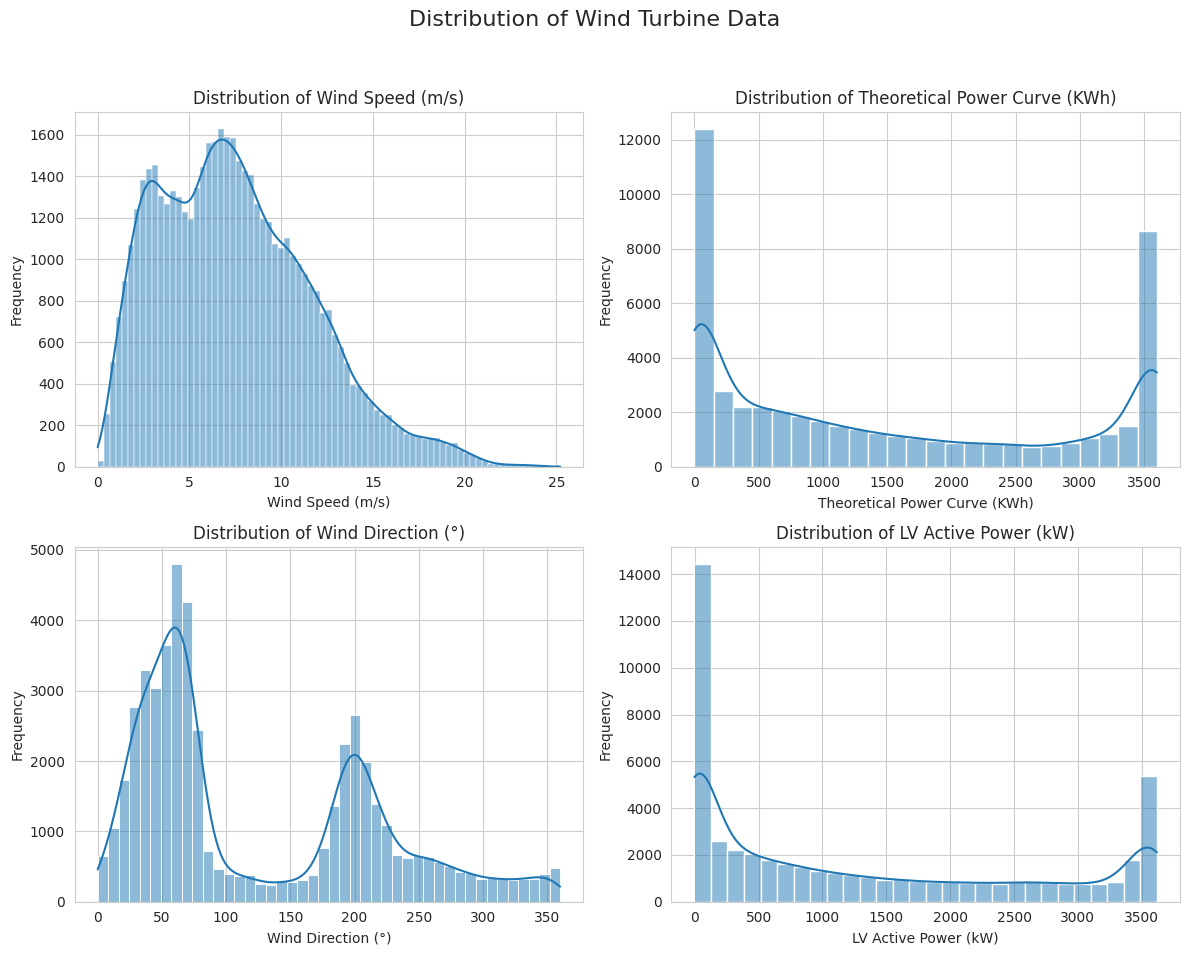

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create histograms for each feature and the target variable
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Wind Turbine Data', fontsize=16)

sns.histplot(df['Wind Speed (m/s)'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Wind Speed (m/s)')
axes[0, 0].set_xlabel('Wind Speed (m/s)')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df['Theoretical_Power_Curve (KWh)'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Theoretical Power Curve (KWh)')
axes[0, 1].set_xlabel('Theoretical Power Curve (KWh)')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df['Wind Direction (°)'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Wind Direction (°)')
axes[1, 0].set_xlabel('Wind Direction (°)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(df['LV ActivePower (kW)'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of LV Active Power (kW)')
axes[1, 1].set_xlabel('LV Active Power (kW)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

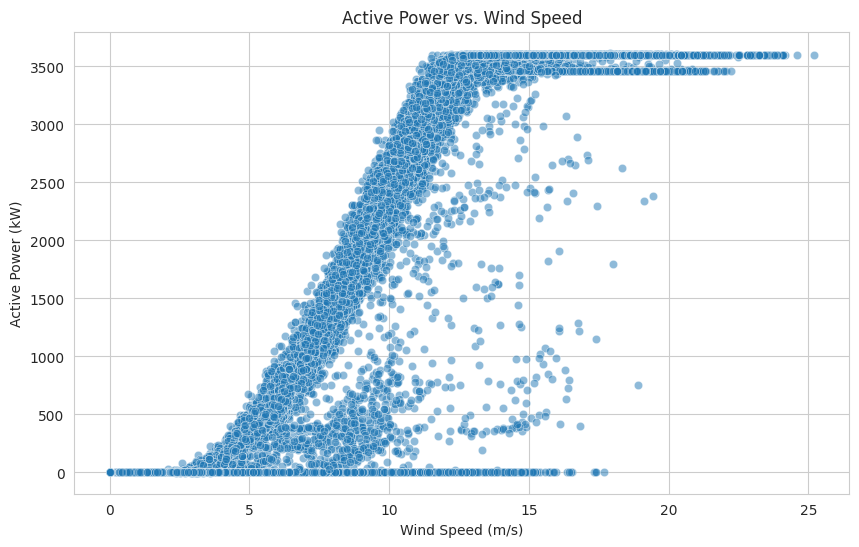

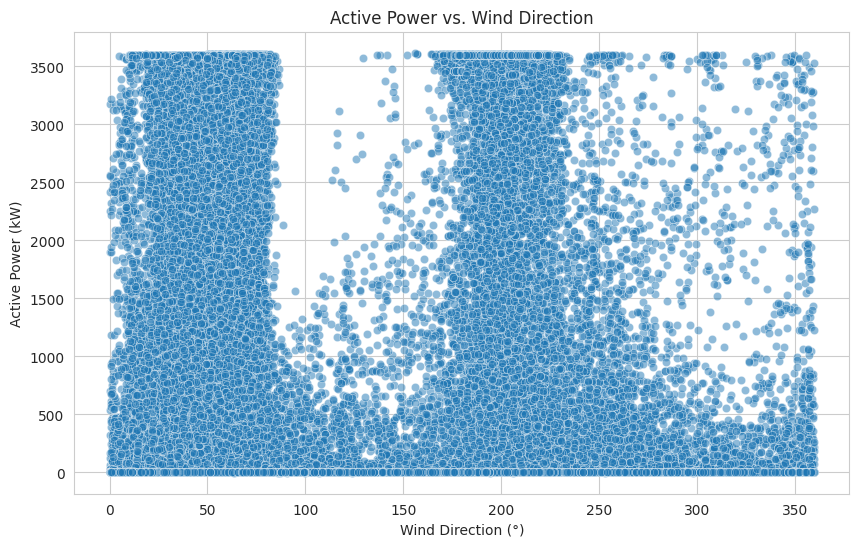

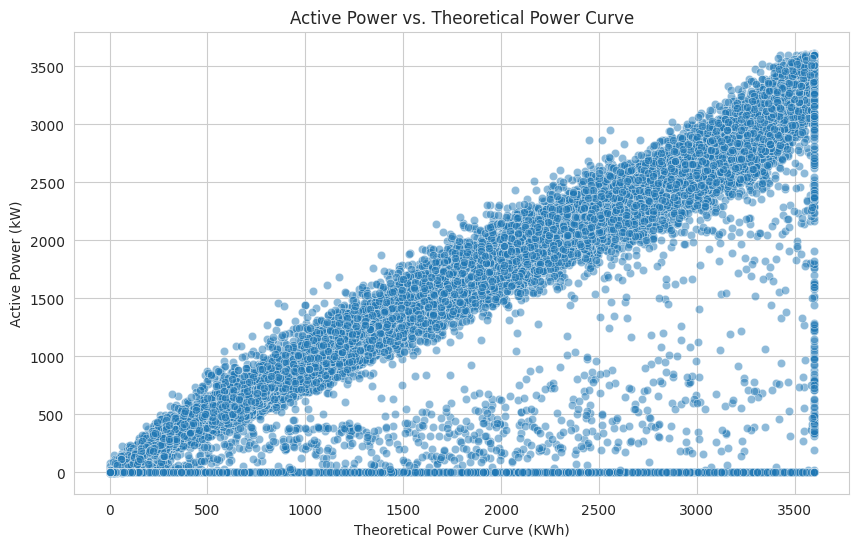

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create scatter plot for Active Power vs. Wind Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Wind Speed (m/s)'], y=df['LV ActivePower (kW)'], alpha=0.5)
plt.title('Active Power vs. Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Active Power (kW)')
plt.show()

# Create scatter plot for Active Power vs. Wind Direction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Wind Direction (°)'], y=df['LV ActivePower (kW)'], alpha=0.5)
plt.title('Active Power vs. Wind Direction')
plt.xlabel('Wind Direction (°)')
plt.ylabel('Active Power (kW)')
plt.show()

# Create scatter plot for Active Power vs. Theoretical Power Curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Theoretical_Power_Curve (KWh)'], y=df['LV ActivePower (kW)'], alpha=0.5)
plt.title('Active Power vs. Theoretical Power Curve')
plt.xlabel('Theoretical Power Curve (KWh)')
plt.ylabel('Active Power (kW)')
plt.show()

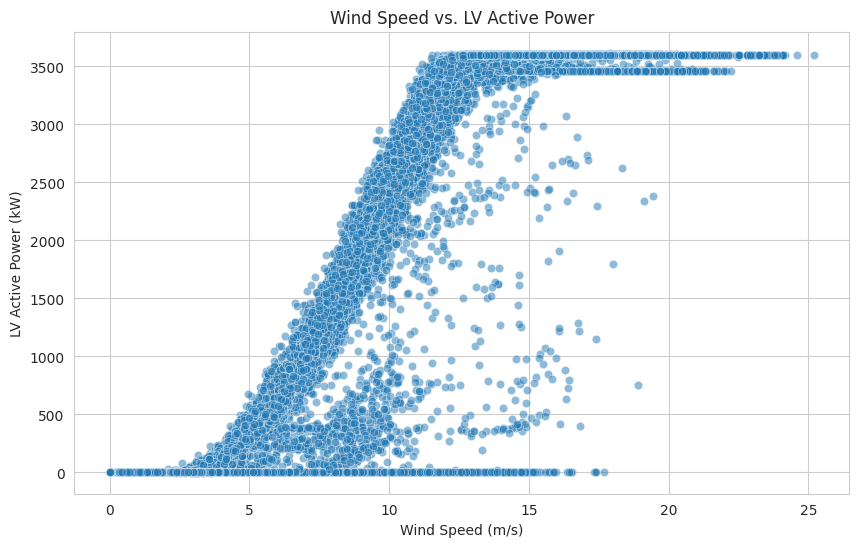

In [ ]:
# Create a scatter plot of Wind Speed vs. LV Active Power
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Wind Speed (m/s)'], y=df['LV ActivePower (kW)'], alpha=0.5)
plt.title('Wind Speed vs. LV Active Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('LV Active Power (kW)')
plt.show()

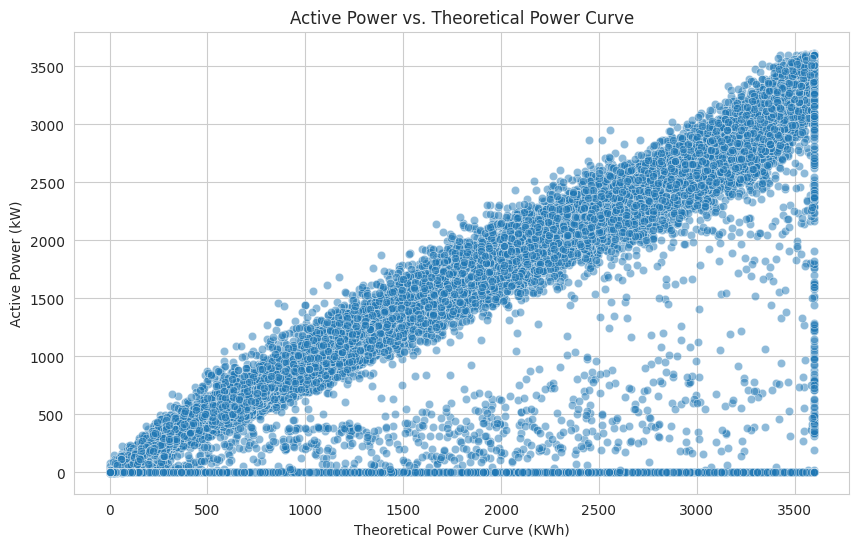

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create scatter plot for Active Power vs. Theoretical Power Curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Theoretical_Power_Curve (KWh)'], y=df['LV ActivePower (kW)'], alpha=0.5)
plt.title('Active Power vs. Theoretical Power Curve')
plt.xlabel('Theoretical Power Curve (KWh)')
plt.ylabel('Active Power (kW)')
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Extract theoretical power and actual active power from filtered_df
theoretical_power = df['Theoretical_Power_Curve (KWh)']
actual_active_power = df['LV ActivePower (kW)']

# Calculate Mean Squared Error (MSE)
mse_theoretical_vs_actual = mean_squared_error(actual_active_power, theoretical_power)

# Calculate R-squared (R2) score
r2_theoretical_vs_actual = r2_score(actual_active_power, theoretical_power)

print(f"MSE between Theoretical Power and Actual Active Power: {mse_theoretical_vs_actual}")
print(f"R-squared between Theoretical Power and Actual Active Power: {r2_theoretical_vs_actual}")

MSE between Theoretical Power and Actual Active Power: 216961.97773573332
R-squared between Theoretical Power and Actual Active Power: 0.8740435026722492
